In [118]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [119]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [120]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [121]:
#Setting path to the database file
database_path = "Resources/hawaii.sqlite"


In [122]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")


In [125]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [126]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [127]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [128]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [133]:
#Not required for assignment but I wanted to look at the data types in the columns
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [134]:
# Find the most recent date in the data set.
engine.execute('SELECT MAX(date) FROM Measurement').fetchall()



[('2017-08-23',)]

In [135]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.


# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)

#Show the calculated year to check
print("Query Date: ", last_year)

#Run query to gather precip data for one year
sel = [Measurement.date, Measurement.prcp]
precip = session.query(*sel).filter(Measurement.date >= last_year).all()
precip

# Save the query results as a Pandas DataFrame and set the index to the date column. Drop NaN values.
precip_df = pd.DataFrame(precip)
reset_precip_df = precip_df.set_index('date').dropna()

# Sort the dataframe by date
sorted_precip_df = reset_precip_df.sort_index()



Query Date:  2016-08-23


,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


In [136]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


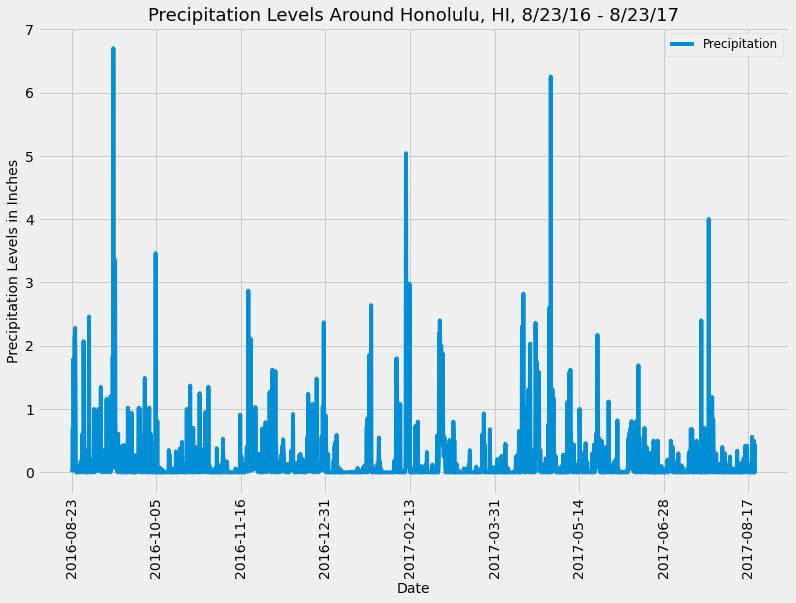

In [144]:
# Use Pandas Plotting with Matplotlib to plot the data

sorted_precip_df.plot(rot=90, figsize = (12,8))
#Set title and font size

plt.title("Precipitation Levels Around Honolulu, HI, 8/23/16 - 8/23/17", fontsize = (18))

#Set y axis label and font size
plt.ylabel("Precipitation Levels in Inches", fontsize = (14))

#Set x axis label and font size
plt.xlabel("Date", fontsize = (14))

#Change legend to say 'Precipitation', set location and size
plt.legend(["Precipitation"], loc = "upper right", prop={"size": 12})

#Display plot
plt.show()


# Exploratory Station Analysis

In [138]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.station).count()
print(stations)

9


In [139]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station, count in active_station:
    print(station, count)


USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [145]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.tobs]
session.query(func.min(*sel),func.max(*sel),func.avg(*sel)).filter(Measurement.station == "USC00519281").all()



[(54.0, 85.0, 71.66378066378067)]

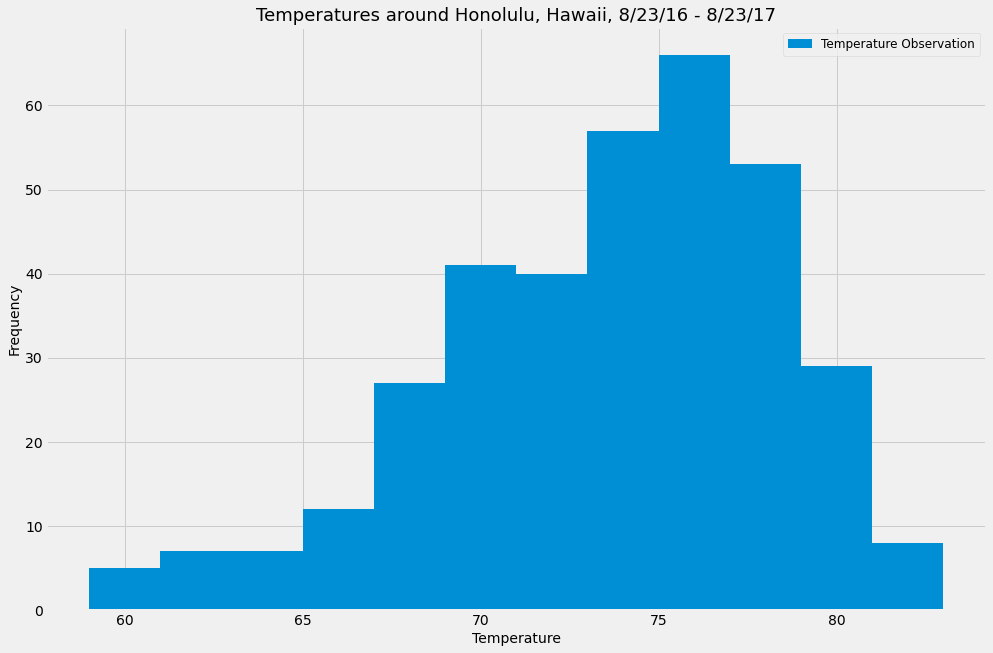

In [146]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Query last 12 months but with temp and filter for most active station
temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last_year).\
    filter(Measurement.station == "USC00519281").all()
temp

# Save the query results as a Pandas DataFrame and set the index to the date column
temp_df = pd.DataFrame(temp)
reset_temp_df = temp_df.set_index('date')
reset_temp_df

#Create a histogram of temperature observations
reset_temp_df['tobs'].plot.hist(grid=True, figsize=(15, 10), bins = 12)
plt.xlabel("Temperature", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.legend(["Temperature Observation"], loc = "best", prop={"size": 12})
plt.title("Temperatures around Honolulu, Hawaii, 8/23/16 - 8/23/17", fontsize = 18)


#Display the plot
plt.show()

# Close session

In [147]:
# Close Session
session.close()